## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

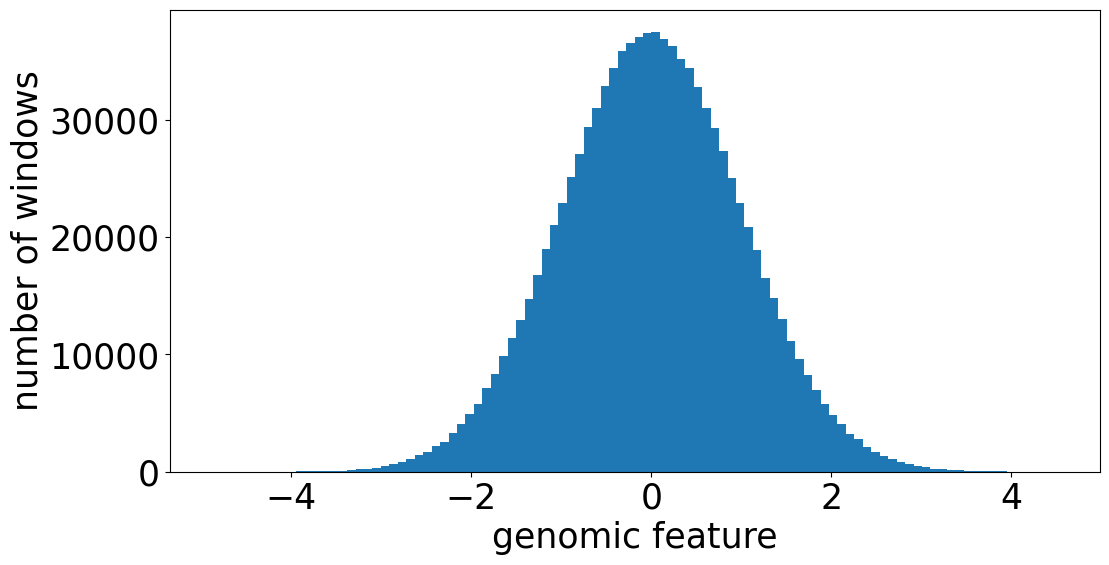

In [1]:
import matplotlib.pyplot as plt

from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 1000000 # Number of intervals

plot_xs(NUMBER_EXAMPLES)

## True mapping from feature to target (mimicking SNV counts)

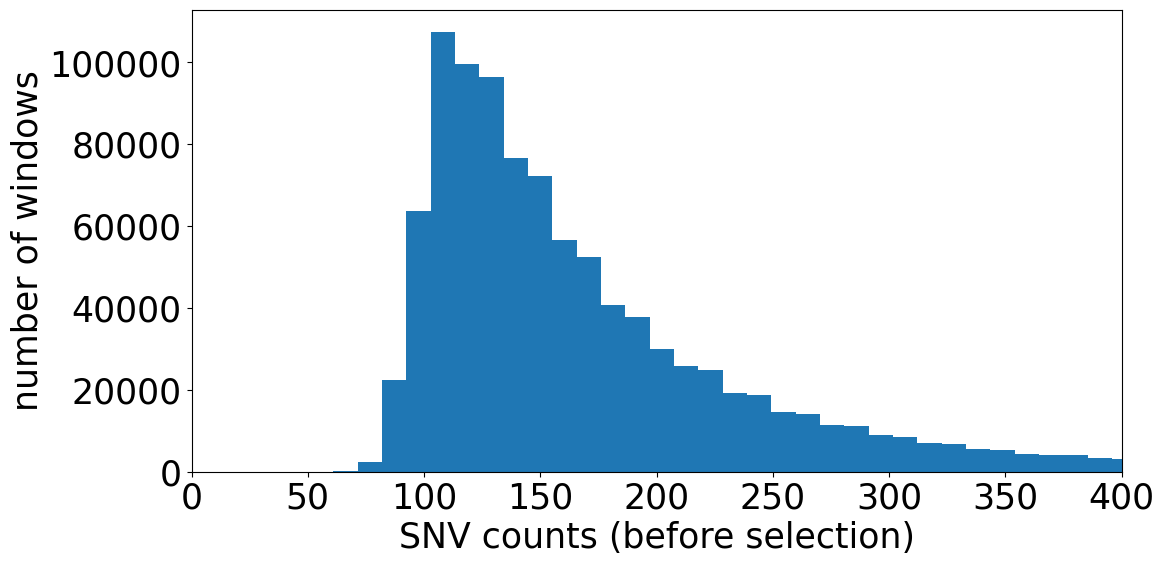

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,0.246213,175.594134,True
1,-1.282593,97.203318,True
2,0.817990,199.947103,True
3,0.583386,165.410450,True
4,-0.313847,118.794254,True
...,...,...,...
999995,-0.941555,107.000000,False
999996,-0.492031,121.000000,False
999997,-1.504066,92.000000,False
999998,0.483613,177.000000,False


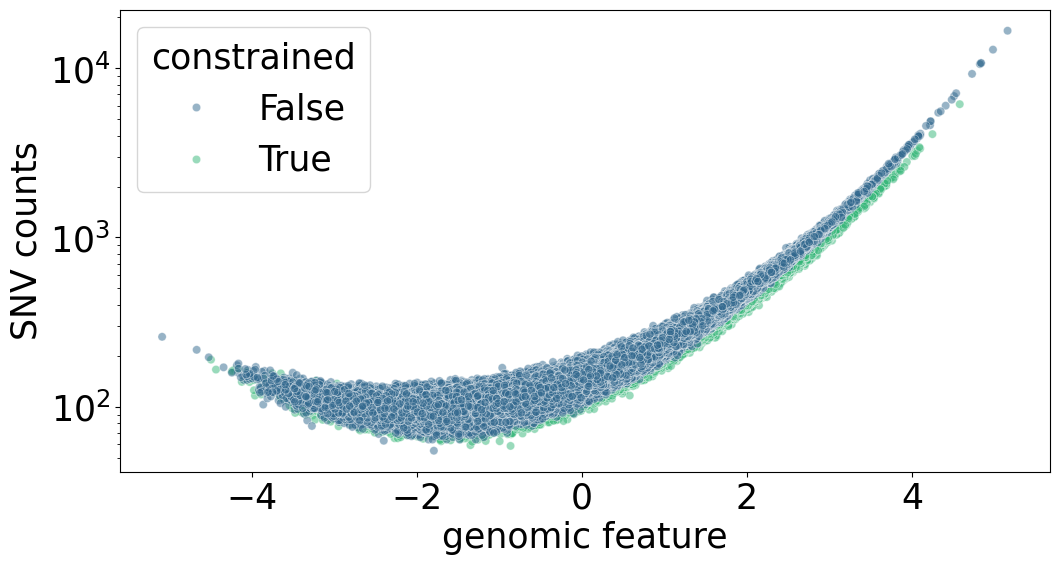

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_2

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_2)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



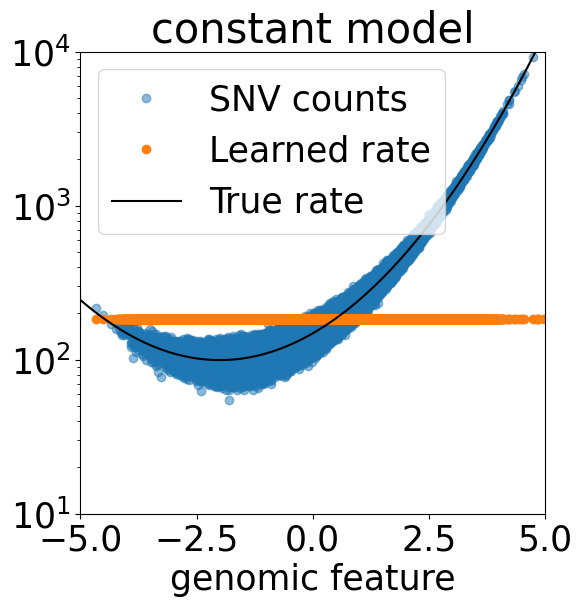

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



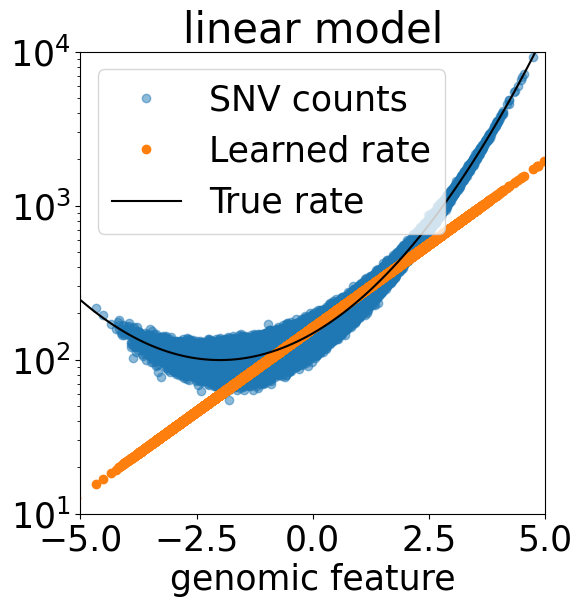

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



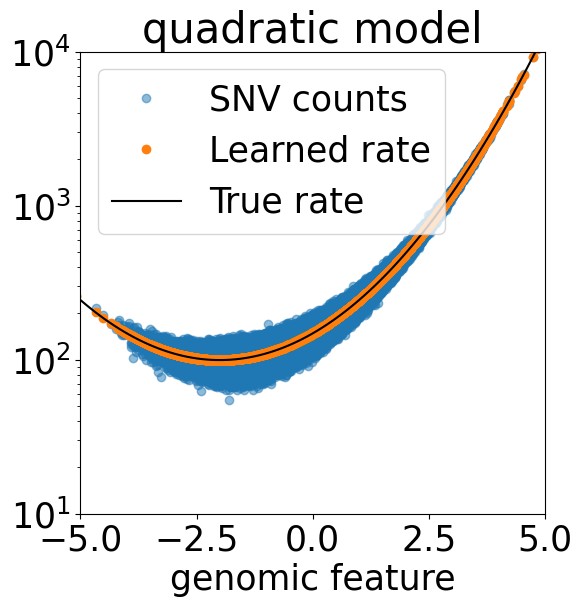

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,0.246213,175.594134,True,183.347674,7.753540,0.572615,182.993981,7.399847,0.547021,0.060621,164.761392,-10.832742,-0.843938
1,-1.282593,97.203318,True,183.347674,86.144357,6.361934,85.099950,-12.103368,-1.312023,1.645045,104.732494,7.529176,0.735710
2,0.817990,199.947103,True,183.347674,-16.599429,-1.225901,243.666196,43.719094,2.800745,0.669108,220.102808,20.155705,1.358580
3,0.583386,165.410450,True,183.347674,17.937224,1.324700,216.655657,51.245207,3.481515,0.340339,193.903118,28.492668,2.046165
4,-0.313847,118.794254,True,183.347674,64.553420,4.767400,138.237705,19.443450,1.653713,0.098500,132.190427,13.396173,1.165147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.941555,107.000000,False,183.347674,76.347674,5.638429,100.949296,-6.050704,-0.602219,0.886526,111.270397,4.270397,0.404835
999996,-0.492031,121.000000,False,183.347674,62.347674,4.604501,126.436526,5.436526,0.483487,0.242094,124.876768,3.876768,0.346920
999997,-1.504066,92.000000,False,183.347674,91.347674,6.746209,76.165830,-15.834170,-1.814326,2.262214,101.956566,9.956566,0.986057
999998,0.483613,177.000000,False,183.347674,6.347674,0.468788,206.096203,29.096203,2.026755,0.233881,184.342855,7.342855,0.540819


In [4]:
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

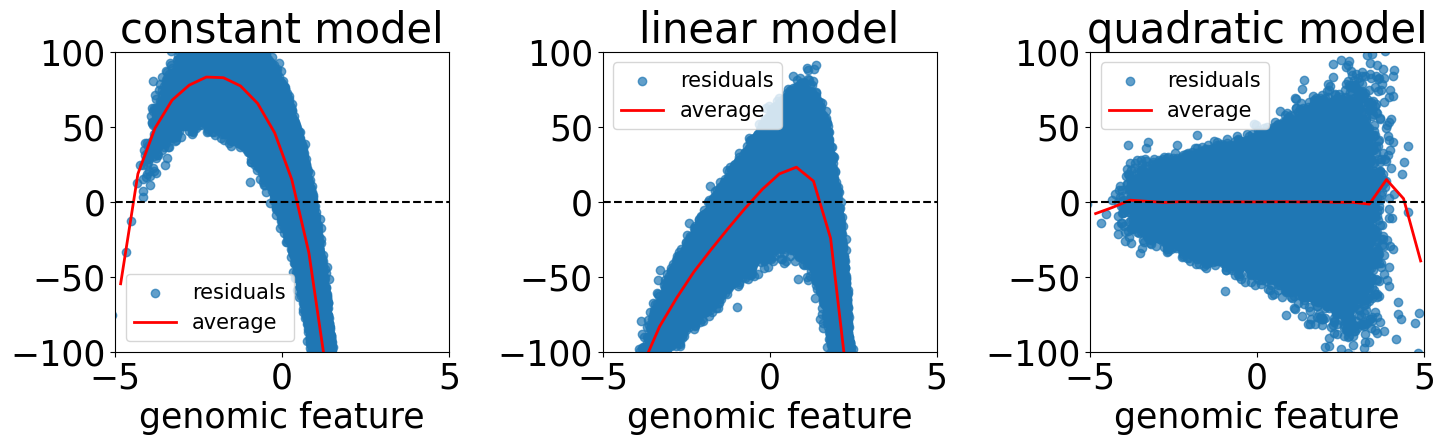

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

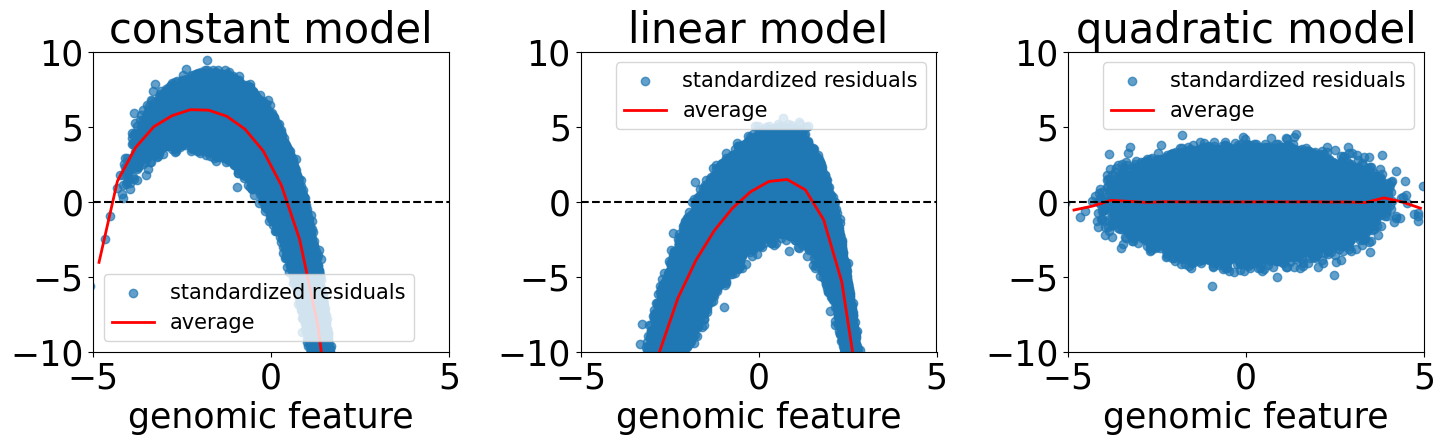

In [5]:
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 25})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES)

## Stratify neutral models' performances by x

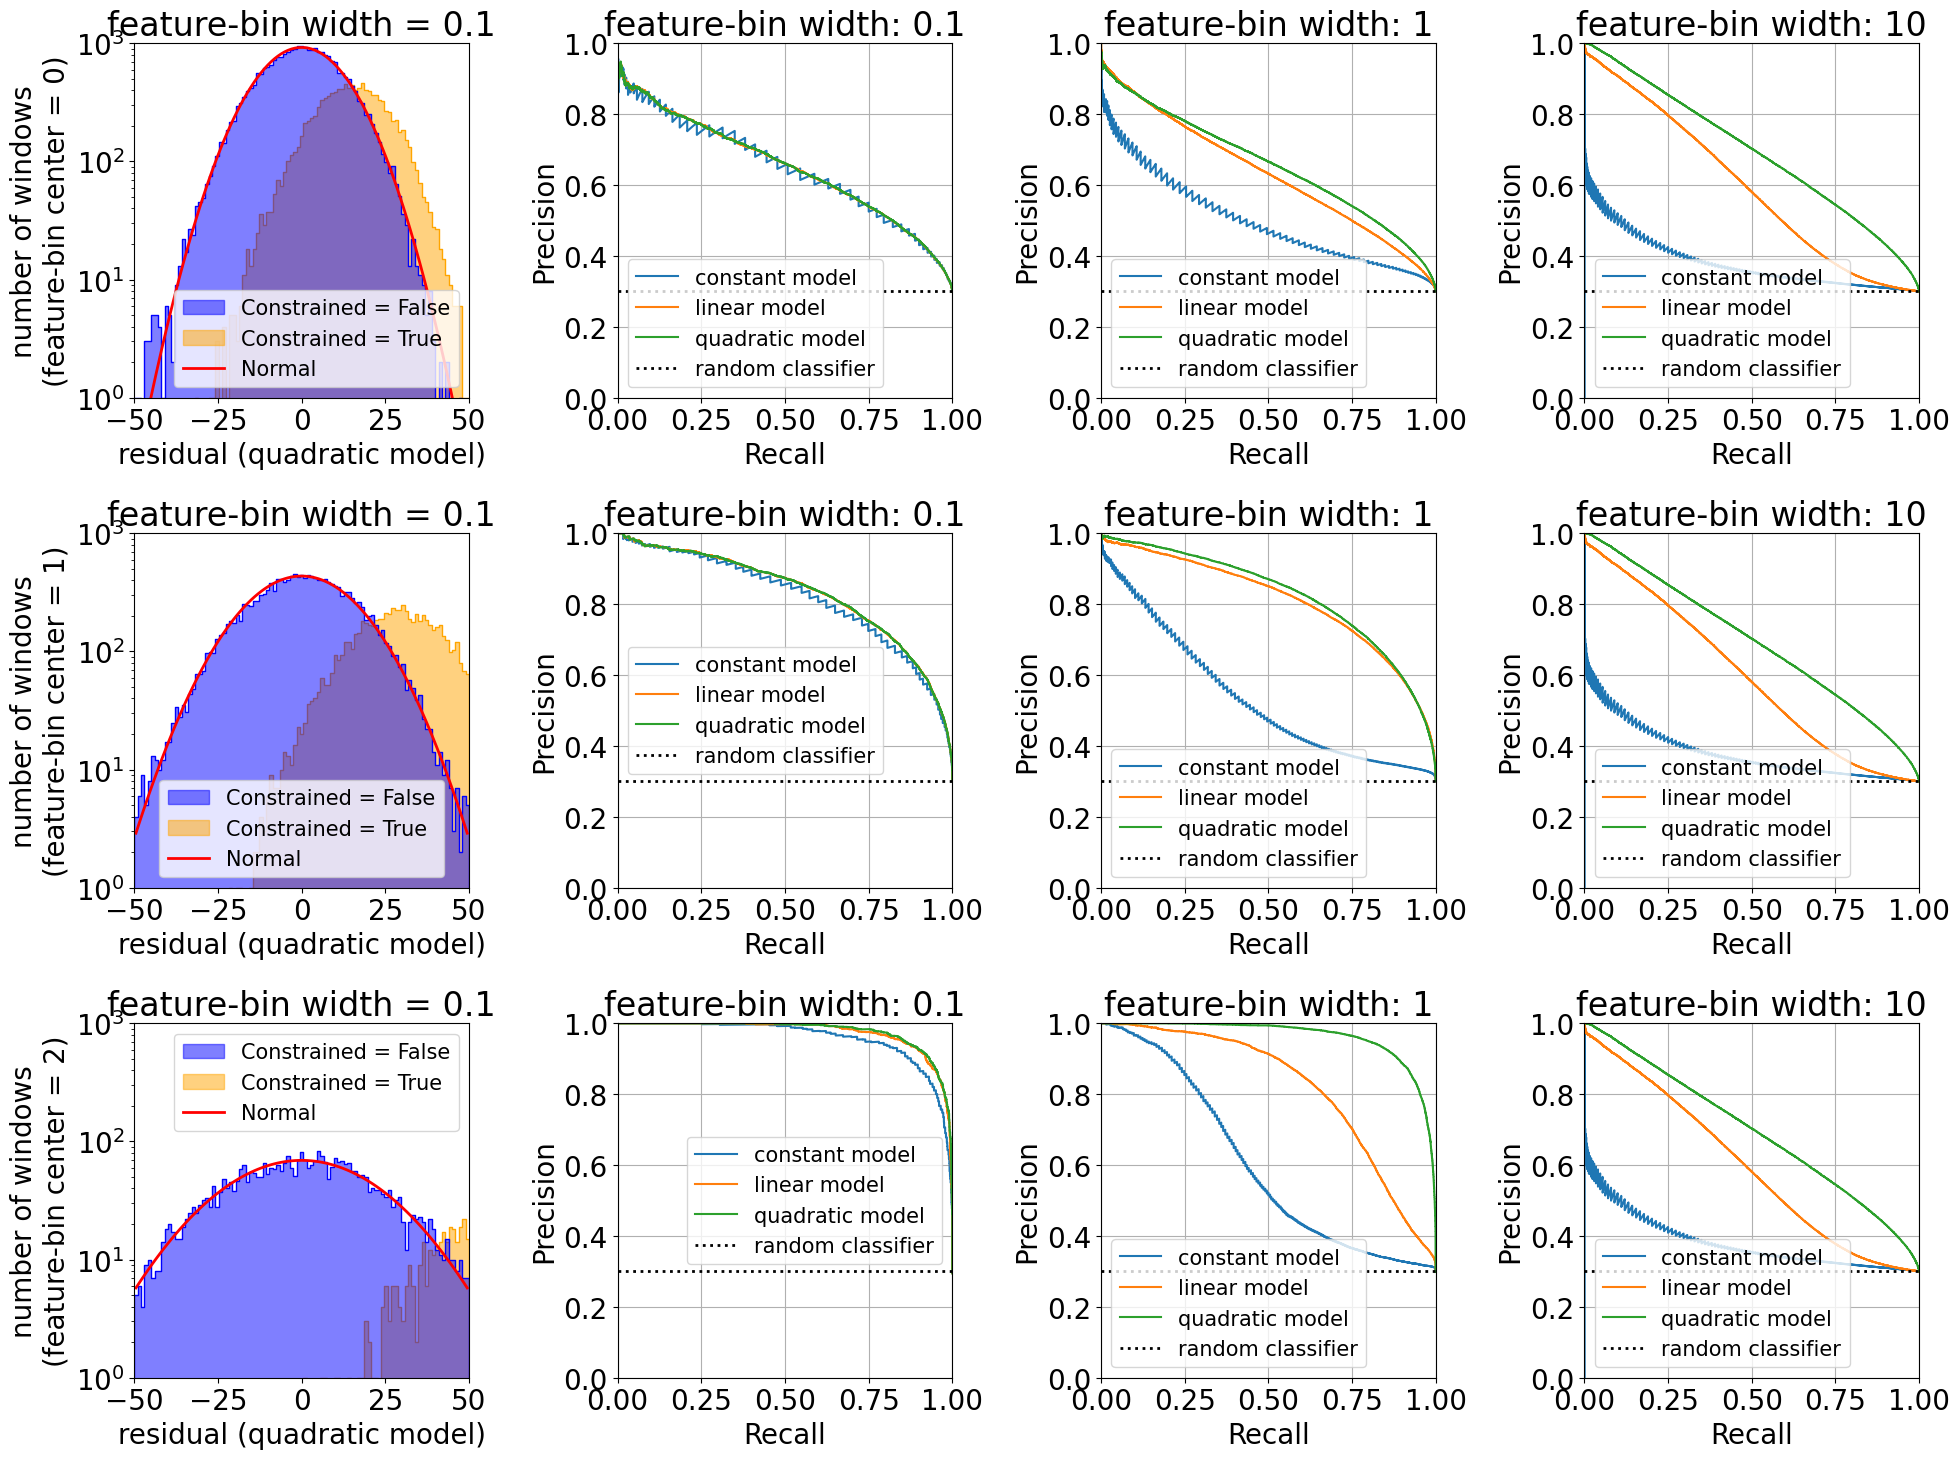

In [6]:
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION)

## Model bias is responsible for poor genome-wide performance 

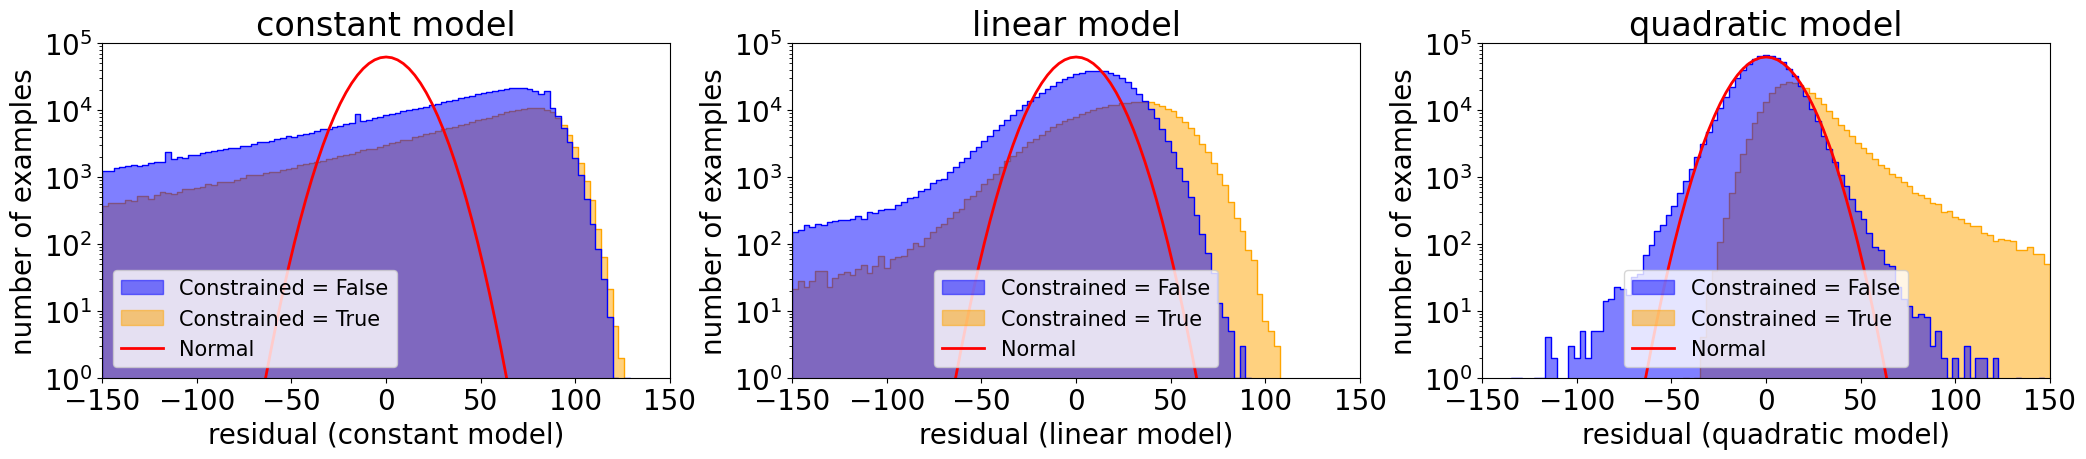

In [7]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

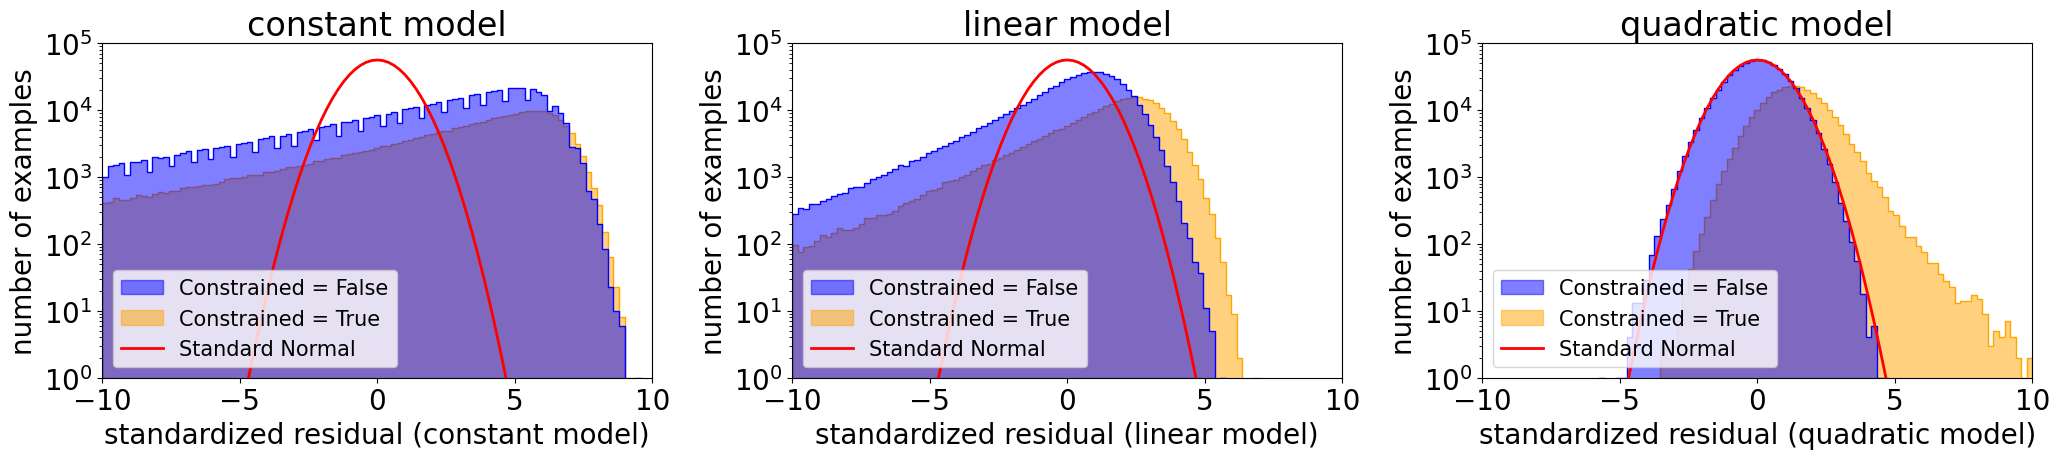

In [8]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


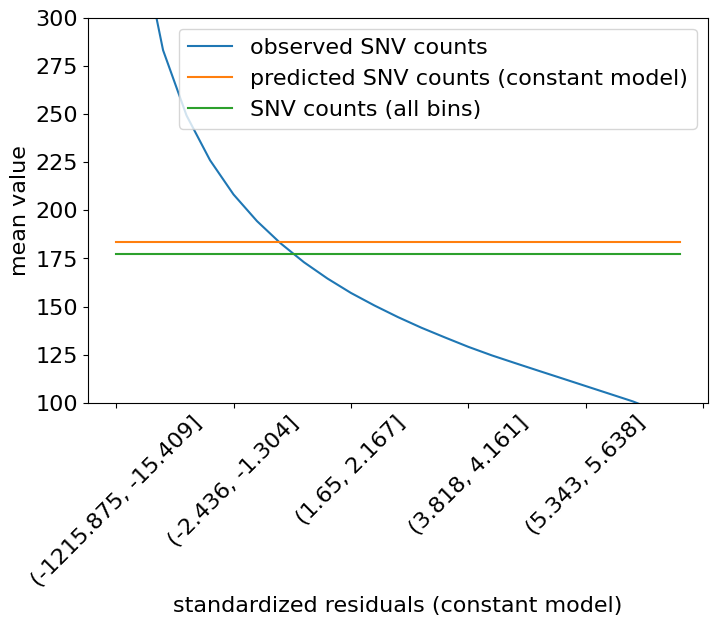

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


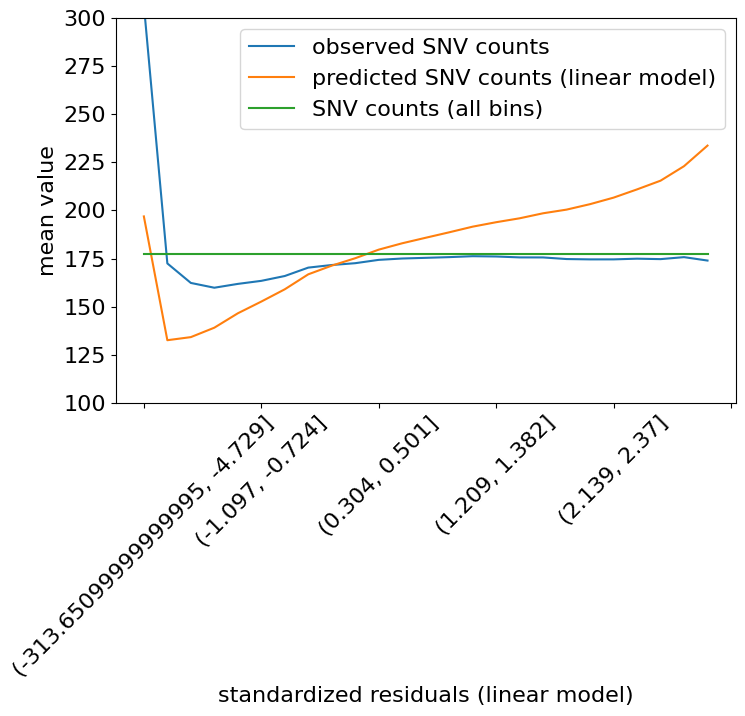

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


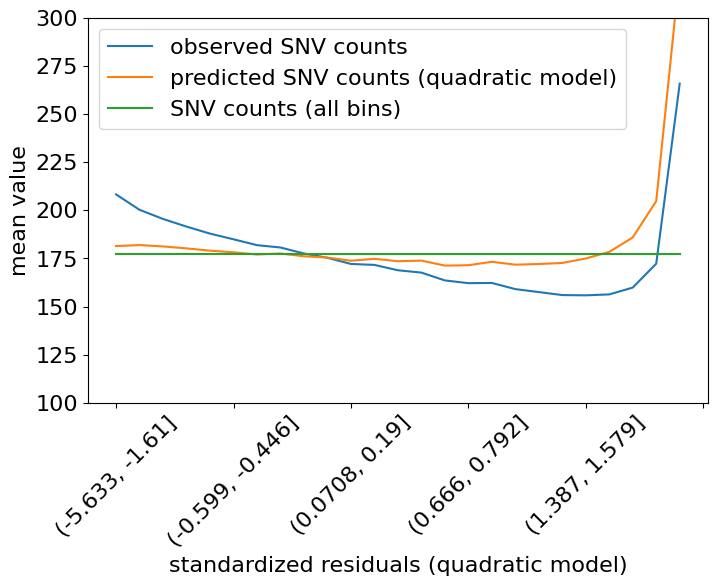

In [9]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

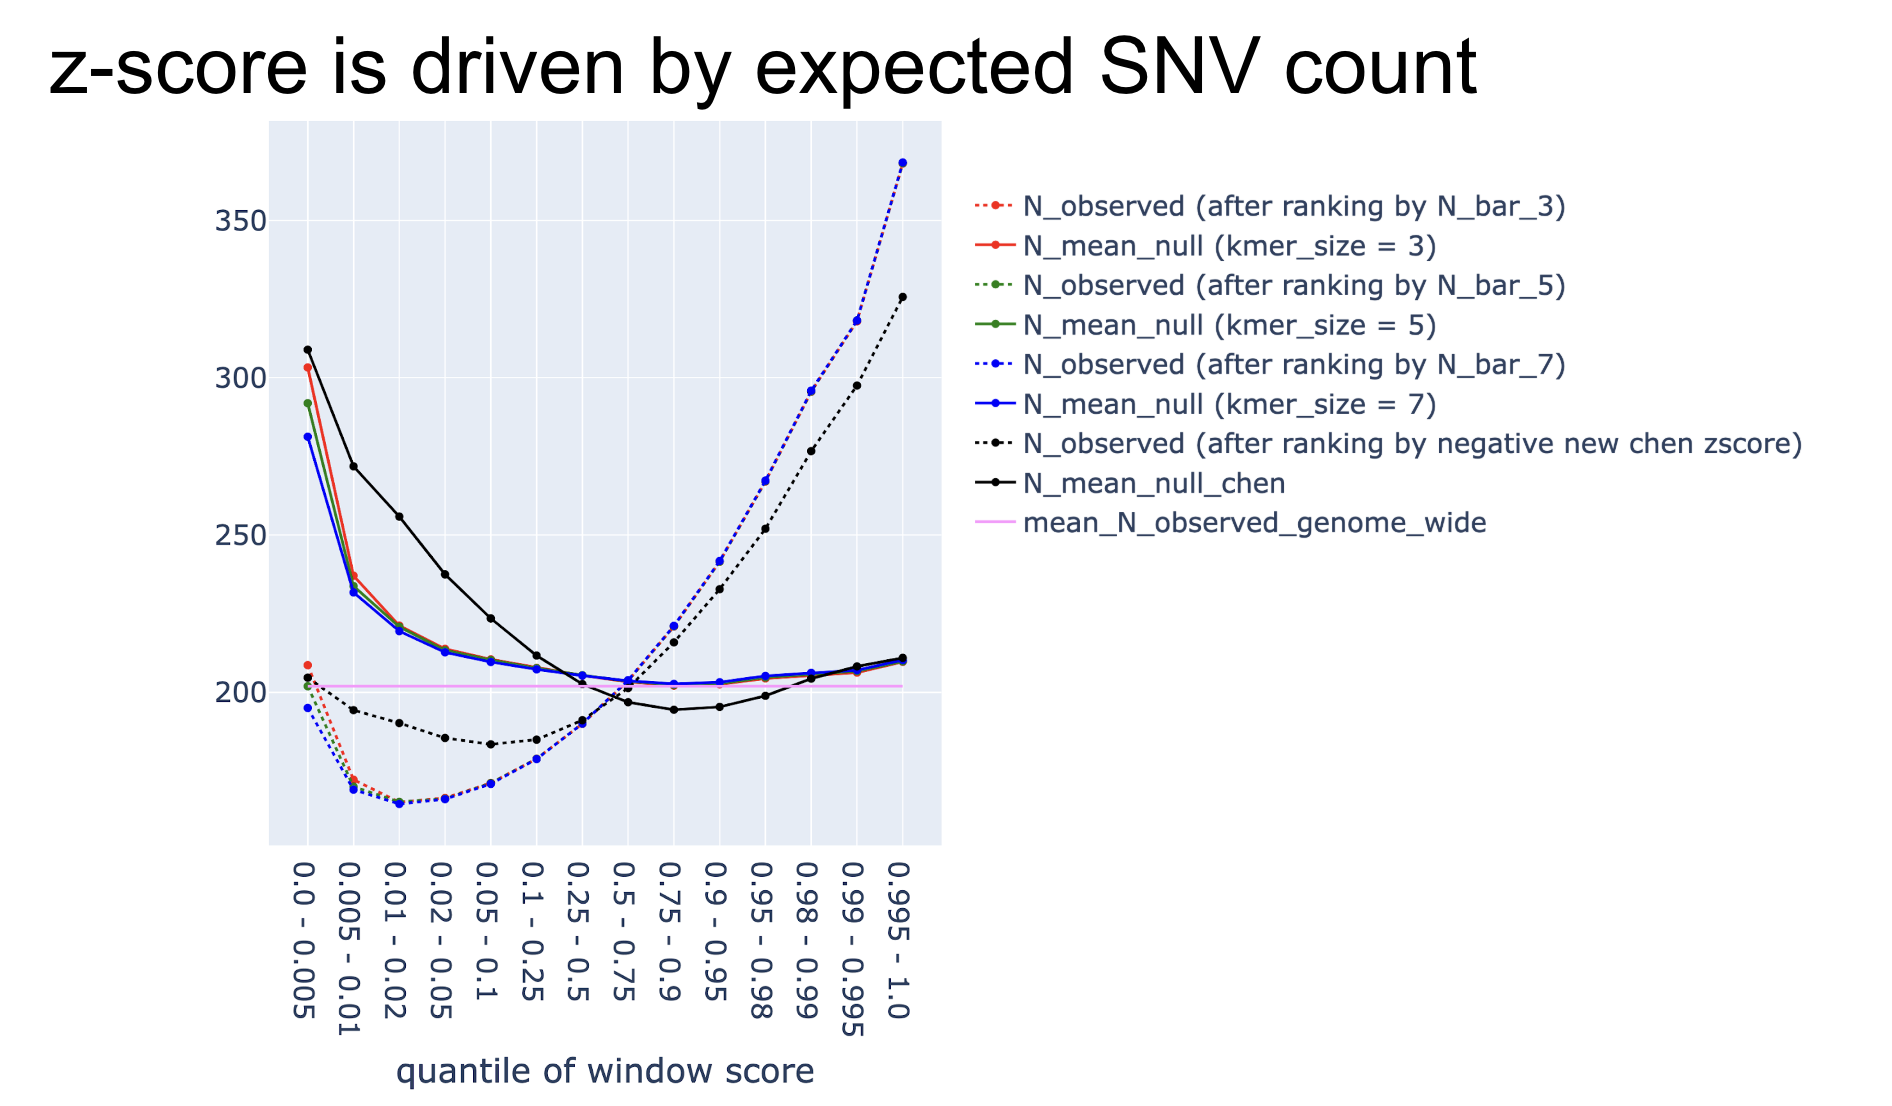

In [10]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)